In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

csv_path = 'files.csv'
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
else:
    df = pd.read_parquet("hf://datasets/tonyassi/celebrity-1000/data/train-00000-of-00001.parquet")

    df['bytes'] = df['image'].apply(lambda x: x['bytes'])
    df['path'] = df['image'].apply(lambda x: x['path'])

    df = df.drop(columns=['image'])


/home/filip/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.head

<bound method NDFrame.head of        label                                              bytes  \
0          0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
1          0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
2          0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
3          0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
4          0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
...      ...                                                ...   
18179    996  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
18180    996  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
18181    996  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
18182    996  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
18183    996  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   

                      path  
0       Aaron-Eckhart0.jpg  
1       Aaron-Eckhart1.jpg  
2      Aaron-Eckhart10.jpg  
3      Aaron-Eckhart11.jpg  
4      Aaron-Eckhart

In [ ]:
import os
import re
from PIL import Image
from io import BytesIO

image_dir = "images_data"

os.makedirs(image_dir, exist_ok=True)

def convert_filename(filename):
    name_without_extension = filename.replace('.', '')[:-3]

    
    name_lower = name_without_extension.lower()
    converted_name = re.sub(r'[^a-z]+', '_', name_lower)
    
    return converted_name[:-1]

if not os.path.exists(csv_path):
    import image_utils
    ids_to_drop = []

    for index, row in df.iterrows():
        try:

            label_dir = os.path.join(image_dir, convert_filename(row['path']))
            if not os.path.exists(label_dir):
                print()
            os.makedirs(label_dir, exist_ok=True)

            image_filename = os.path.join(label_dir, row['path'])
            if not os.path.exists(image_filename):
                img = Image.open(BytesIO(row['bytes'])) 
                img = img.convert("RGB")
                try:
                    img = image_utils.crop_and_resize_face(img, image_filename)
                    img.save(image_filename, "JPEG")
                    print(image_filename.split('/')[-1], end=", ")
                    df.loc[index, 'path'] = image_filename
                except ValueError as e:
                    print(e)
                    ids_to_drop.append(index)
                    bad.append[row]
            
        except Exception as e:
            print(f"Error saving image for row {index}: {e}")

    df.drop(ids_to_drop)
    df = df.drop(columns=['bytes']) # no longer needed
    df['label'] = df['label'].astype(str) # ImageDataGenerator takes y input in type string
    df.head()

    df.to_csv(csv_path)



Aaron-Eckhart0.jpg, Aaron-Eckhart1.jpg, Aaron-Eckhart10.jpg, Aaron-Eckhart11.jpg, Aaron-Eckhart12.jpg, Aaron-Eckhart13.jpg, Aaron-Eckhart14.jpg, Aaron-Eckhart15.jpg, Aaron-Eckhart16.jpg, Aaron-Eckhart2.jpg, Aaron-Eckhart3.jpg, Aaron-Eckhart4.jpg, Aaron-Eckhart5.jpg, Aaron-Eckhart6.jpg, Aaron-Eckhart7.jpg, Aaron-Eckhart8.jpg, Aaron-Eckhart9.jpg, 
Aaron-Paul0.jpg, Aaron-Paul1.jpg, Aaron-Paul10.jpg, Aaron-Paul11.jpg, Aaron-Paul12.jpg, Aaron-Paul13.jpg, Aaron-Paul14.jpg, Aaron-Paul15.jpg, Aaron-Paul16.jpg, Aaron-Paul17.jpg, Aaron-Paul18.jpg, Aaron-Paul19.jpg, Aaron-Paul2.jpg, Aaron-Paul3.jpg, Aaron-Paul4.jpg, Aaron-Paul5.jpg, Aaron-Paul6.jpg, Aaron-Paul7.jpg, Aaron-Paul8.jpg, Aaron-Paul9.jpg, 
Aaron-Rodgers0.jpg, Aaron-Rodgers1.jpg, Aaron-Rodgers10.jpg, Aaron-Rodgers11.jpg, Aaron-Rodgers12.jpg, Aaron-Rodgers13.jpg, Aaron-Rodgers14.jpg, Aaron-Rodgers15.jpg, Aaron-Rodgers16.jpg, Aaron-Rodgers17.jpg, Aaron-Rodgers18.jpg, Aaron-Rodgers2.jpg, Aaron-Rodgers3.jpg, Aaron-Rodgers4.jpg, Aaron-Rodge

UnboundLocalError: cannot access local variable 'face_net' where it is not associated with a value

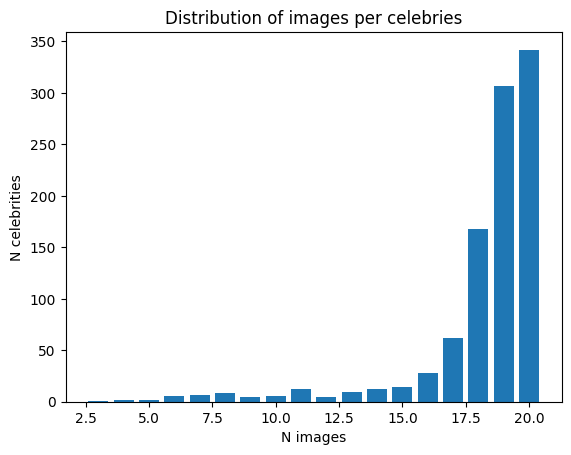

In [8]:
import matplotlib.pyplot as plt
counts = {}

for dir in os.listdir('images_data/'):
    path = os.path.join('images_data/', dir)
    if not os.path.isdir(path):
        continue
    n_files = len(os.listdir(path))
    if not n_files in counts:
        counts[n_files] = 1
    else:
        counts[n_files] += 1
    
max_n_files = max(counts.keys())
min_n_files = min(counts.keys())

plt.bar(list(counts.keys()), list(counts.values()))

plt.xlabel('N images')
plt.ylabel('N celebrities')
plt.title('Distribution of images per celebries')

plt.show()


In [9]:
for index, row in df.iterrows():
    path = row['path']
    if not os.path.exists(path):
        path = os.path.join(image_dir, convert_filename(path), path)
        df.loc[index, 'path'] = path
        print(df.iloc[index])


label                                                  110
path     images_data/images_data_bryan_cranston_bryan_c...
Name: 2031, dtype: object
label                                                  521
path     images_data/images_data_justin_herbert_justin_...
Name: 9547, dtype: object
label                                                  521
path     images_data/images_data_justin_herbert_justin_...
Name: 9550, dtype: object
label                                                  833
path     images_data/images_data_rosario_dawson_rosario...
Name: 15208, dtype: object


In [11]:

train_ratio=0.8

train_df, test_df = train_test_split(df, train_size=train_ratio, stratify=df['label'])

# Duplicating pictures of Tyrone Gibson (who?) for some reason there're not put into the test ds
# Caused mismatch in shapes
df_label_954 = df[df['label'] == '954'].sample(n=1)
train_df.drop(df_label_954.index)
test_df = pd.concat([test_df, df_label_954])

train_labels = set(train_df['label'])
test_labels = set(test_df['label'])

print("Training set size:", len(train_df), 'classes: ', len(test_labels))
print("Test set size:", len(test_df), 'classes: ', len(test_labels))


Training set size: 14547 classes:  997
Test set size: 3638 classes:  997


In [12]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rows=256  #Number of Pixels in the Rows for Input. 
cols=256  #Number of Pixels in Columns for Output

2024-12-01 15:00:52.344978: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733061652.361566   48038 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733061652.366480   48038 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 15:00:52.383325: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
trained_model=MobileNetV2(input_shape=(rows,cols,3),           
                    include_top=False,
                    weights='imagenet')   


trained_model.trainable=True  #Un-Freeze all the pretrained layers of 'MobileNetV2 for Training.
    
trained_model.summary()

/tmp/ipykernel_48038/620238923.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  trained_model=MobileNetV2(input_shape=(rows,cols,3),
I0000 00:00:1733061655.309052   48038 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4773 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 128, 128,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 128, 128,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 128, 128,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 128, 128,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 128, 128,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 128, 128,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 129, 129,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 64, 64,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 64,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 64,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 64, 64,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [14]:
last_layer=trained_model.get_layer('out_relu')   
last_layer_output=last_layer.output  #Saves the output of the last layer of the MobileNetV2.

In [15]:
#Callback Function which stops training when accuracy reaches target %.

target_acc = 0.95

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > target_acc):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks=myCallback()

model_path = 'celeb_recognition.keras'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_path,
    save_best_only=True,
    monitor='accuracy',
    mode='max',
    verbose=1
)

In [16]:
if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
    print(f"Model loaded from {model_path}")
else:
    n_classes = 997
    x = tf.keras.layers.GlobalAveragePooling2D()(last_layer_output)
    #Add a Dropout layer.
    x = tf.keras.layers.Dropout(0.8)(x)                      
    # Add a final softmax layer for classification.
    x = tf.keras.layers.Dense(n_classes, activation='softmax')(x)
    
    model = tf.keras.Model(trained_model.input,x) 
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(1e-4),
                  metrics=['accuracy'])
    #Summary of the model.
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 128, 128,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 128, 128,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 128, 128,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 128, 128,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 128, 128,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 128, 128,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 129, 129,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 64, 64,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 64,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 64,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 64, 64,    │      2,304 │ block_1_depthwis

 Total params: 3,535,141 (13.49 MB)

 Trainable params: 3,501,029 (13.36 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [17]:
train_df['label'] = train_df['label'].astype(str)
test_df['label'] = test_df['label'].astype(str)
train_datagen = ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 rotation_range=40,
                                 width_shift_range=0.4,
                                 height_shift_range=0.1)
                                 
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_dataframe(
                                                  dataframe=train_df,
                                                  target_size=(rows,cols),
                                                  x_col='path',
                                                  y_col = 'label',
                                                  class_mode='categorical')

test_generator=test_datagen.flow_from_dataframe(
                                                dataframe=test_df,
                                                target_size=(rows,cols),
                                                x_col='path',
                                                y_col = 'label',
                                                class_mode='categorical')

Found 14544 validated image filenames belonging to 997 classes.
Found 3637 validated image filenames belonging to 997 classes.


/home/filip/.local/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(
/home/filip/.local/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


In [18]:
epochs=50

result=model.fit(train_generator,
                 validation_data=test_generator,
                 epochs=epochs,
                 callbacks=[callbacks, checkpoint_callback],
                 verbose=1)

/home/filip/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1733061710.607842   52984 service.cc:148] XLA service 0x7f34cc016d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733061710.607876   52984 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-12-01 15:01:51.254041: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733061713.879770   52984 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1733061726.770838   52984 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1733061726.903797   52984 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
I0000 00:00:1733061739.423966   5

221/455 ━━━━━━━━━━━━━━━━━━━━ 1:36 411ms/step - accuracy: 3.0347e-04 - loss: 7.3297

E0000 00:00:1733061840.793070   52984 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1733061840.924127   52984 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 5.7081e-04 - loss: 7.1989
Epoch 1: accuracy improved from -inf to 0.00089, saving model to celeb_recognition.keras
455/455 ━━━━━━━━━━━━━━━━━━━━ 274s 488ms/step - accuracy: 5.7152e-04 - loss: 7.1986 - val_accuracy: 8.2486e-04 - val_loss: 6.9888
Epoch 2/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 8.4644e-04 - loss: 6.9242
Epoch 2: accuracy improved from 0.00089 to 0.00110, saving model to celeb_recognition.keras
455/455 ━━━━━━━━━━━━━━━━━━━━ 182s 399ms/step - accuracy: 8.4700e-04 - loss: 6.9242 - val_accuracy: 0.0011 - val_loss: 6.9017
Epoch 3/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.0017 - loss: 6.9069
Epoch 3: accuracy improved from 0.00110 to 0.00227, saving model to celeb_recognition.keras
455/455 ━━━━━━━━━━━━━━━━━━━━ 182s 399ms/step - accuracy: 0.0017 - loss: 6.9069 - val_accuracy: 0.0011 - val_loss: 6.8565
Epoch 4/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.0034 - loss: 6.8413
Epo

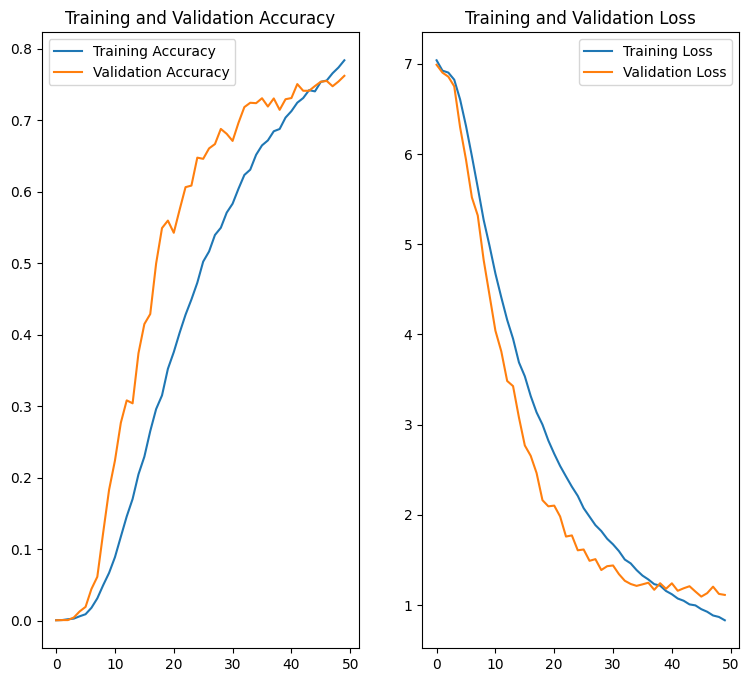

In [19]:
import matplotlib.pyplot as plt

acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

loss = result.history['loss']
val_loss = result.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(9, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
import image_utils

test_images = [os.path.join('test_images', image) for image in os.listdir('test_images')]

classes=train_generator.class_indices
class_ids=list(classes.keys())
celeb_names = pd.read_csv('celeb_names.csv')

import cv2
image_utils.face_net = cv2.dnn.readNetFromCaffe(
    "deploy.prototxt",
    "res10_300x300_ssd_iter_140000_fp16.caffemodel"
)

def get_name(id):
    name = celeb_names.loc[celeb_names['id'] == id, 'name'].values
    if len(name) > 0:
        return name[0]
    else:
        return None

image_arrays = []
filtered_files = []

for image_path in test_images:
    try:
        img = Image.open(image_path)
        img = image_utils.crop_and_resize_face(img, image_path)
        img_array = np.array(img) / 255.0
        image_arrays.append(img_array)
        filtered_files.append(image_path)
    except ValueError as e:
            print(e)

batch_array = np.stack(image_arrays, axis=0)

scores = model.predict(batch_array)

for i, score in enumerate(scores):
    top_5_indices = np.argsort(score)[-5:][::-1]
    top_5_celeb_ids = [int(class_ids[idx]) for idx in top_5_indices]
    top_5_names = [get_name(celeb_id) for celeb_id in top_5_celeb_ids]
    top_5_scores = [score[idx] * 100 for idx in top_5_indices]

    print(f"The person in {filtered_images[i]} looks like {top_5_names[0]}, likeness score of {top_5_scores[0]:.1f}%")
    print('Ohter honorable mentions are:')
    for s, n in zip(top_5_scores[1:], top_5_names[1:]):
        if s < 1:
            break
        print(f'{n}, likness score of {s:.1f}%')
    print()

No face detected with sufficient confidence in test_images/fedora.jpg, best confidence: 0.12966635823249817
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
The person in test_images/carrey.jpg looks like John Turturro, likeness score of 26.9%
Ohter honorable mentions are:
Martin Freeman, likness score of 25.0%
Jim Carrey, likness score of 20.2%
Bill Hader, likness score of 8.2%
Colin Firth, likness score of 2.9%

The person in test_images/dualipa.jpg looks like Lily Aldridge, likeness score of 30.7%
Ohter honorable mentions are:
Eiza Gonzalez, likness score of 28.5%
Dua Lipa, likness score of 5.8%
Naomi Scott, likness score of 3.7%
Hailee Steinfeld, likness score of 3.3%

The person in test_images/jayz.jpg looks like Jay-Z, likeness score of 42.2%
Ohter honorable mentions are:
Lizzo, likness score of 12.3%
Lily Allen, likness score of 12.0%
Maya Angelou, likness score of 7.2%
Whoopi Goldberg, likness score of 3.9%

The person in test_images/kanye.jpg looks like Usain Bolt, likeness score of 78.7%
